# Projeto de Análise de Vinhos

Este projeto tem como objetivo explorar um conjunto de dados sobre vinhos, analisando **preço**, **pontuação de qualidade**, **país de origem** e **tipo de uva**.  
Através de técnicas de análise de dados e visualização, buscamos responder a perguntas importantes como:

- Qual país produz os vinhos mais bem avaliados?  
- Existe relação entre o preço e a qualidade do vinho?  
- Quais tipos de uva se destacam pela qualidade?  
- Qual é o melhor vinho em cada faixa de preço (USD)?  

Além disso, utilizamos gráficos de barras, histogramas, nuvens de palavras e regressões para compreender melhor os padrões presentes nos dados.  
O resultado é uma visão mais clara sobre como diferentes fatores influenciam a avaliação dos vinhos e quais escolhas podem ser feitas de acordo com o orçamento.

---
# Etapas do Projeto

- **Entendimento do negócio**  
- **Compreensão dos dados**  
- **Tratamento e limpeza dos dados**  
- **Análise** (extração de informações para responder às perguntas do projeto)  


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/winemag-data-130k-v2.csv', engine='python', on_bad_lines='skip')

In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


##Sumário

- Unnamed: 0
Índice antigo, pode ser removido.

- country
País de origem do vinho.

- description
Descrição feita pelo crítico.

- designation
Nome específico do vinho na vinícola.

- points
Pontuação dada ao vinho.

- price
Preço em dólares.

- province
Província ou estado de origem.

- region_1
Região vitivinícola principal.

- region_2
Sub-região (quando existe).

- taster_name
Nome do avaliador.

- taster_twitter_handle
Twitter do avaliador.

- title
Título da avaliação.

- variety
Tipo de uva usada.

- winery
Nome da vinícola.

##Perguntas

- De qual país vem o melhor vinho
- Existe relaççao entre o peço do vinho com a qualidade
- Qual melhor vinho em cada faixa de preco



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25861 entries, 0 to 25860
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             25861 non-null  int64  
 1   country                25850 non-null  object 
 2   description            25861 non-null  object 
 3   designation            18484 non-null  object 
 4   points                 25861 non-null  int64  
 5   price                  23982 non-null  float64
 6   province               25850 non-null  object 
 7   region_1               21534 non-null  object 
 8   region_2               9912 non-null   object 
 9   taster_name            20501 non-null  object 
 10  taster_twitter_handle  19550 non-null  object 
 11  title                  25861 non-null  object 
 12  variety                25860 non-null  object 
 13  winery                 25860 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 2.8+

In [5]:
df.describe()

,Unnamed: 0,points,price
count,25861.000000,25861.000000,23982.000000
mean,12930.000000,88.383589,34.875448
std,7465.571992,2.994496,41.085264
min,0.000000,80.000000,4.000000
25%,6465.000000,86.000000,17.000000
50%,12930.000000,88.000000,25.000000
75%,19395.000000,91.000000,42.000000
max,25860.000000,100.000000,2500.000000


##Tabela de Classificação por Pontos:

98–100 — Clássico

94–97 — Soberbo

90–93 — Excelente

87–89 — Muito bom

83–86 — Bom

80–82 — Aceitável

In [6]:
df['country'].value_counts().head(5)

,count
country,
US,10641
France,4445
Italy,3929
Spain,1294
Portugal,1173


In [7]:
df["variety"].value_counts()

,count
variety,
Pinot Noir,2621
Chardonnay,2254
Cabernet Sauvignon,1901
Red Blend,1768
Bordeaux-style Red Blend,1403
...,...
Verdil,1
Verduzzo Friulano,1
Coda di Volpe,1


## Limpeza dos dados

 obs : sempre copiar o DF para não usar o original

In [8]:
dados_2 = df.copy()

In [9]:
dados_2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [10]:
dados_2 = dados_2.drop([
    'Unnamed: 0',
    'country',
    'designation',
    'region_1',
    'region_2',
    'taster_name',
    'taster_twitter_handle'
], errors='ignore')


In [11]:
dados_2.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [12]:
dados_2 = dados_2.drop(columns=[
    'Unnamed: 0',
    'country',
    'designation',
    'region_1',
    'region_2',
    'taster_name',
    'taster_twitter_handle'
], errors='ignore')


In [13]:
dados_2['country'] = df['country']


In [14]:
dados_2.head()

,description,points,price,province,title,variety,winery,country
0,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Italy
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Portugal
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,US
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,US
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,US


In [15]:
dados_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25861 entries, 0 to 25860
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  25861 non-null  object 
 1   points       25861 non-null  int64  
 2   price        23982 non-null  float64
 3   province     25850 non-null  object 
 4   title        25861 non-null  object 
 5   variety      25860 non-null  object 
 6   winery       25860 non-null  object 
 7   country      25850 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.6+ MB


In [16]:
#Calcular a % para saber se posso ou nao remover os dados ausentes
print('{:.0%}'.format(dados_2['price'].count() / dados_2.shape[0]))



93%


In [17]:
dados_2 = dados_2.dropna(subset=['price', 'variety','province', 'country'])
dados_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23973 entries, 1 to 25859
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  23973 non-null  object 
 1   points       23973 non-null  int64  
 2   price        23973 non-null  float64
 3   province     23973 non-null  object 
 4   title        23973 non-null  object 
 5   variety      23973 non-null  object 
 6   winery       23973 non-null  object 
 7   country      23973 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.6+ MB


## Análise Exploratória:


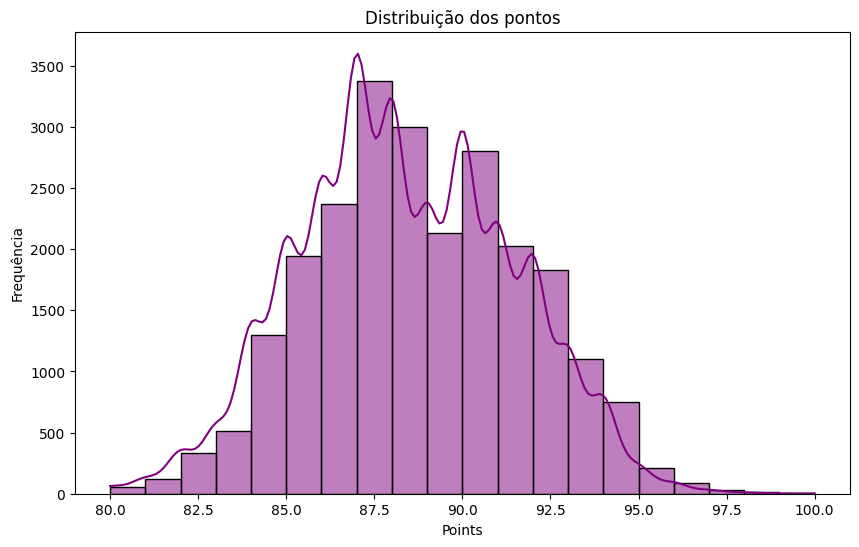

In [18]:


plt.figure(figsize=(10, 6))
sns.histplot(dados_2['points'], bins=20, kde=True, color='purple')
plt.title('Distribuição dos pontos')
plt.xlabel('Points')
plt.ylabel('Frequência')
plt.show()


In [19]:
vinhos_top_10 = dados_2['country'].value_counts().head(10)
vinhos_top_10

,count
country,
US,10603
France,3554
Italy,3363
Spain,1279
Portugal,1014
Chile,948
Argentina,776
Austria,530
Australia,441


Text(0, 0.5, 'Quantidade de Vinhos')

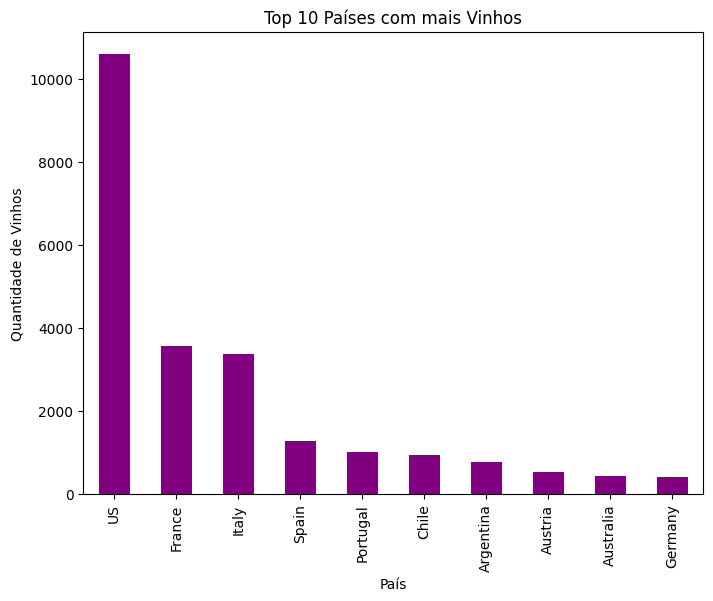

In [20]:
plt.figure(figsize=(8, 6))
vinhos_top_10.plot(kind='bar', color='purple')
plt.title('Top 10 Países com mais Vinhos')
plt.xlabel('País')
plt.ylabel('Quantidade de Vinhos')

In [21]:
melhor_qualidade = dados_2.groupby('country')['points'].mean()
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
melhor_qualidade



,points
country,
India,93.000000
England,91.428571
Austria,90.224528
Germany,89.777240
Switzerland,89.500000
Canada,89.392857
Lebanon,89.333333
Hungary,89.250000
Luxembourg,89.000000


/tmp/ipython-input-765665125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=melhor_qualidade, x='points', y='country', palette='Purples_r')


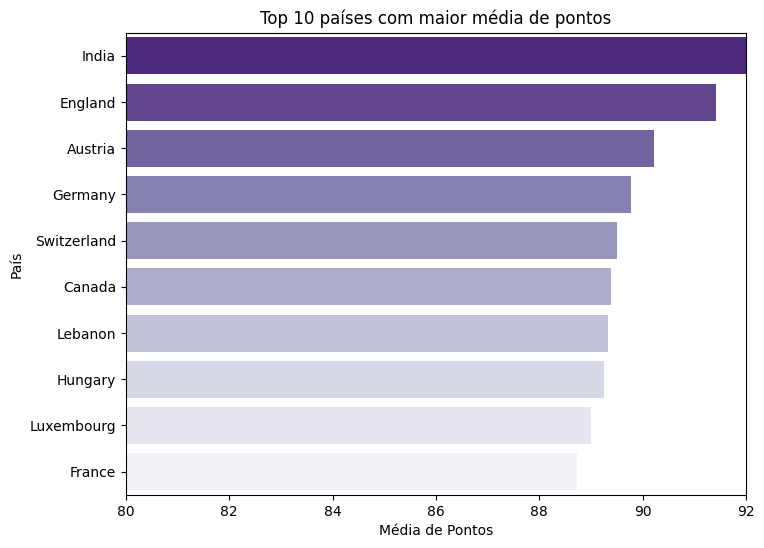

In [22]:

melhor_qualidade = dados_2.groupby('country')['points'].mean().reset_index()
melhor_qualidade = melhor_qualidade.sort_values(by='points', ascending=False)[:10]


plt.figure(figsize=(8, 6))
sns.barplot(data=melhor_qualidade, x='points', y='country', palette='Purples_r')

plt.xlim(80, 92)
plt.xlabel("Média de Pontos")
plt.ylabel("País")
plt.title("Top 10 países com maior média de pontos")
plt.show()



In [23]:
acima_de_95_pontos = dados_2[dados_2['points'] >= 95]
acima_de_95_pontos['country'].value_counts()

,count
country,
US,131
France,104
Italy,59
Portugal,11
Australia,9
Germany,9
Spain,7
Austria,4
Hungary,1


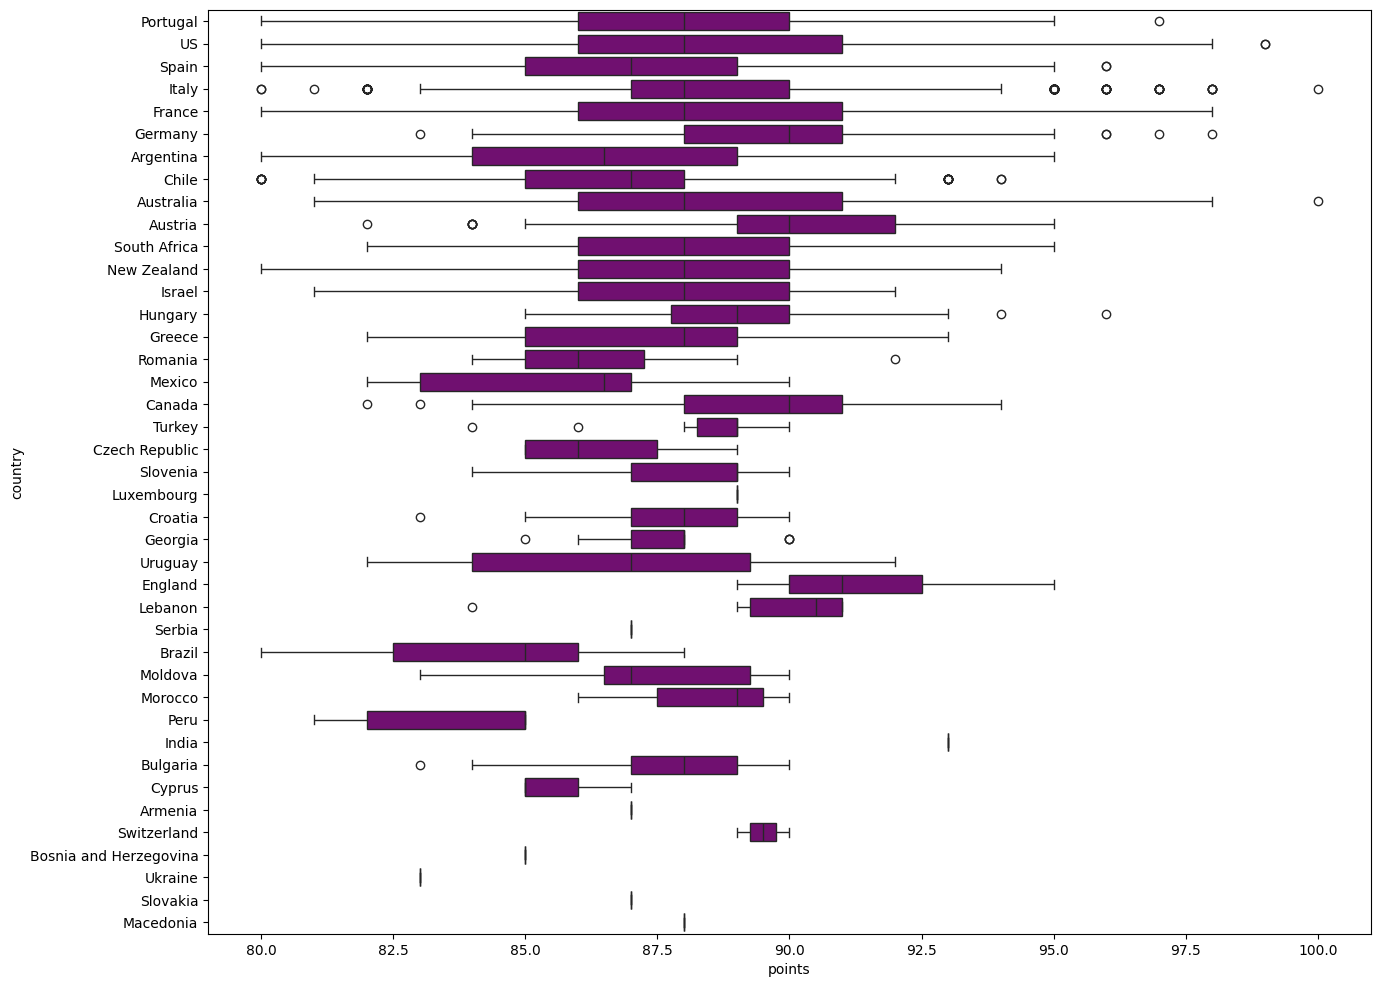

In [24]:
plt.figure(figsize=(15, 12))
sns.boxplot(data = dados_2 , x = 'points', y = 'country', color= 'Purple')
plt.show()

/tmp/ipython-input-1705793885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=preco_medio.values, y=preco_medio.index, palette='Purples_r')


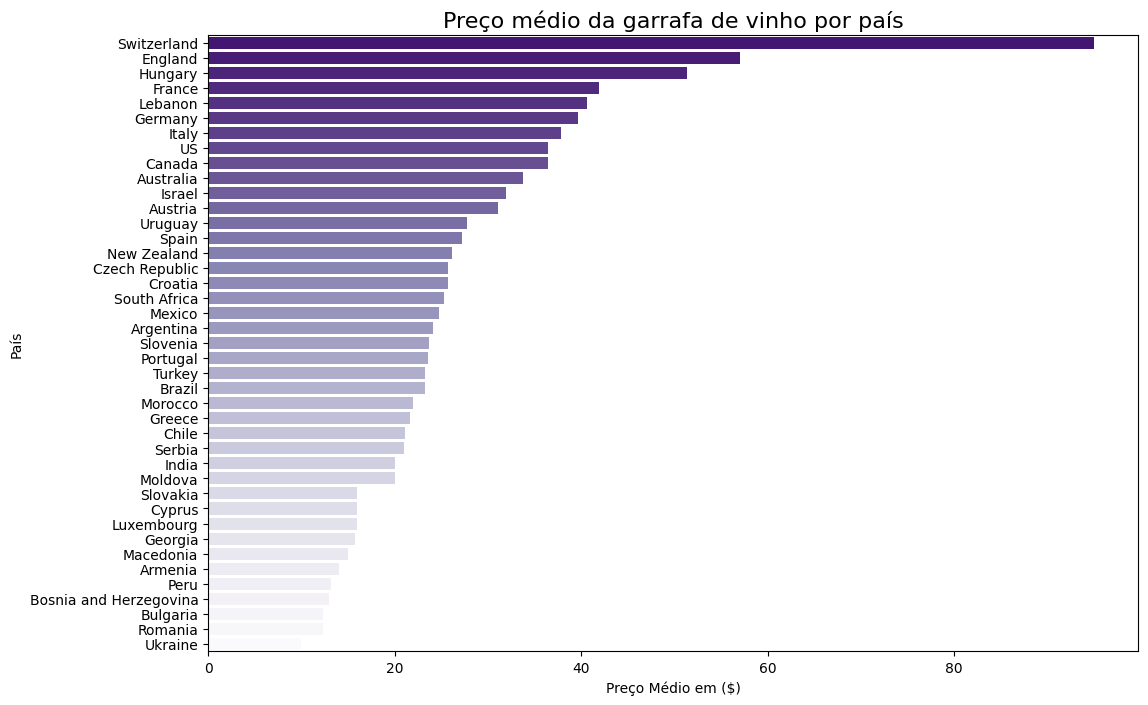

In [40]:
preco_medio = dados_2.groupby('country')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=preco_medio.values, y=preco_medio.index, palette='Purples_r')

plt.title('Preço médio da garrafa de vinho por país', fontsize=16)
plt.xlabel('Preço Médio em ($)')
plt.ylabel('País')
plt.show()


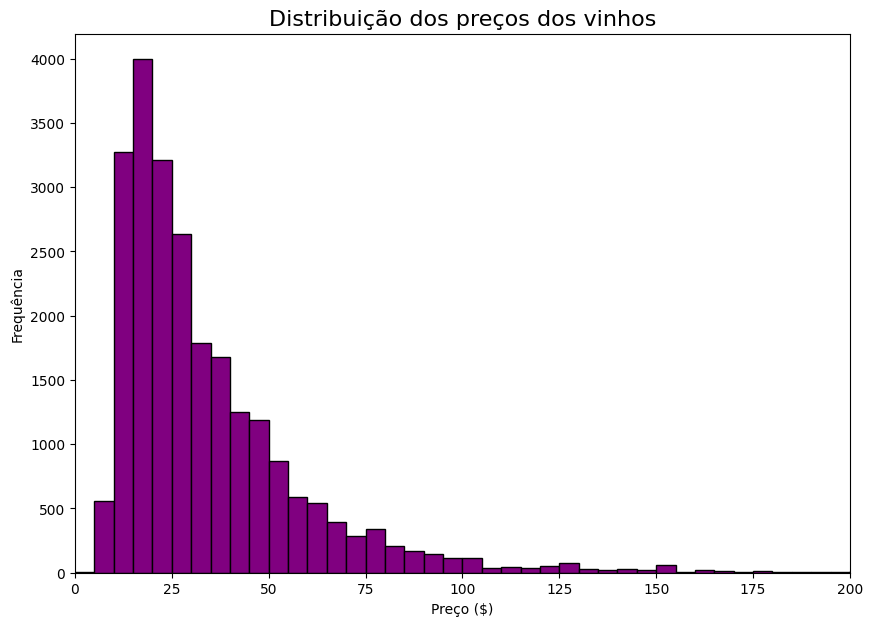

In [44]:
plt.figure(figsize=(10,7))

# Definindo os intervalos (bins) de 5 em 5 até o valor máximo
bins = np.arange(0, dados_2['price'].max() + 5, 5)

plt.hist(data=dados_2, x='price', bins=bins, color='purple', edgecolor='black')

plt.xlim(0,200)
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')
plt.show()


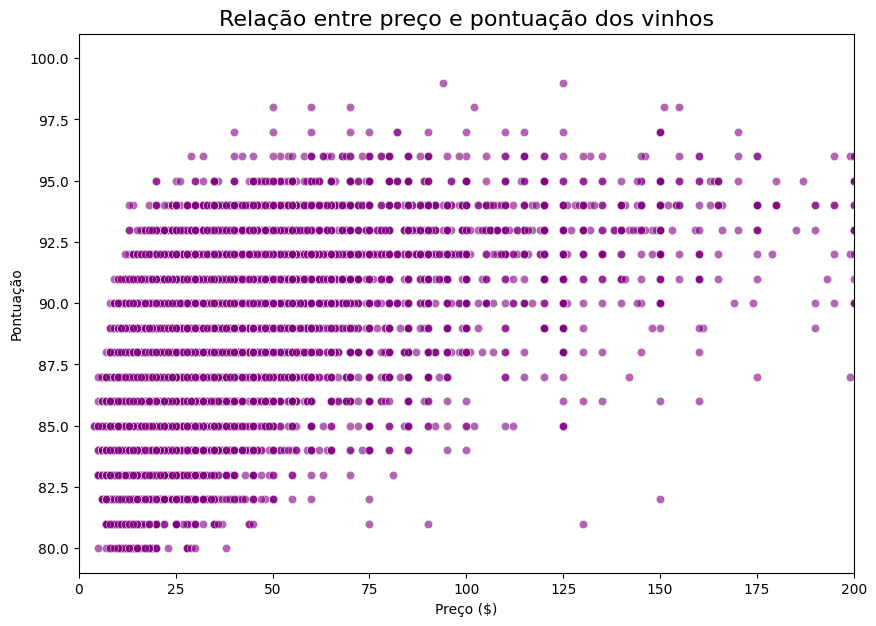

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.scatterplot(data=dados_2, x='price', y='points', color='purple', alpha=0.6)

plt.title('Relação entre preço e pontuação dos vinhos', fontsize=16)
plt.xlabel('Preço ($)')
plt.ylabel('Pontuação')
plt.xlim(0, 200)   # opcional: limitar eixo x para evitar outliers muito altos
plt.show()


In [48]:
dados_2['variety'].value_counts()[:20]


,count
variety,
Pinot Noir,2519
Chardonnay,2139
Cabernet Sauvignon,1886
Red Blend,1663
Bordeaux-style Red Blend,1060
Riesling,1002
Sauvignon Blanc,1001
Syrah,797
Merlot,587


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Merlot'),
  Text(9, 0, 'Rosé'),
  Text(10, 0, 'Malbec'),
  Text(11, 0, 'Zinfandel'),
  Text(12, 0, 'Portuguese Red'),
  Text(13, 0, 'Sangiovese'),
  Text(14, 0, 'Nebbiolo'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Cabernet Franc')])

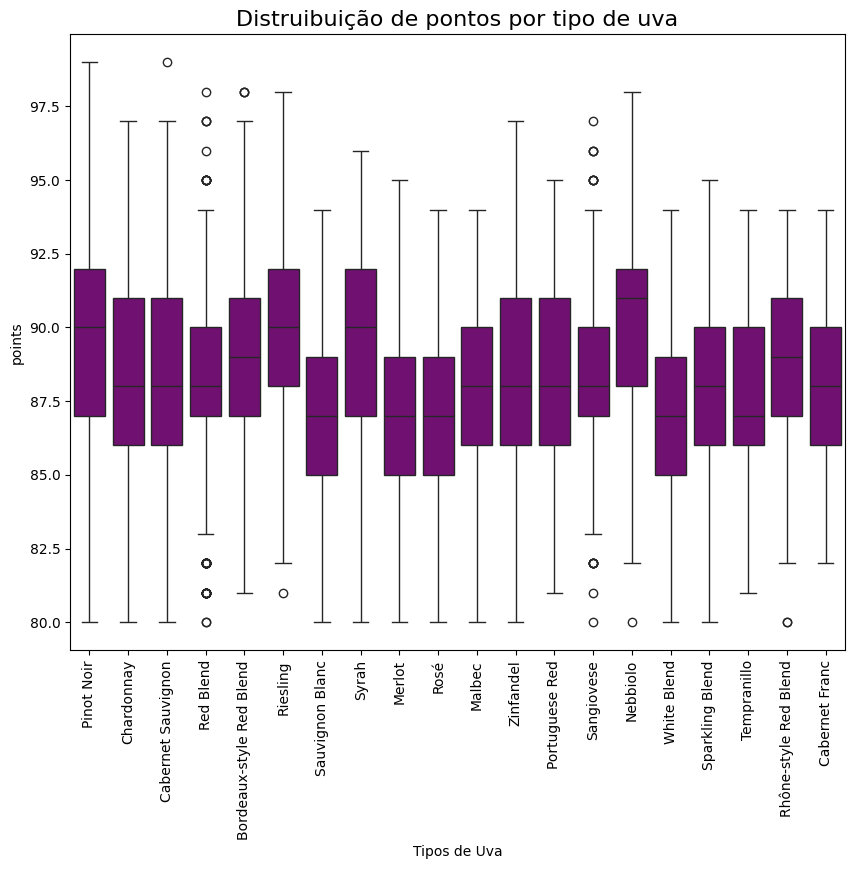

In [52]:
plt.figure(figsize=(10,8))
sns.boxplot(data= dados_2, x = 'variety',y= 'points', color = 'Purple', order = dados_2['variety'].value_counts().iloc[:20].index)
plt.title('Distruibuição de pontos por tipo de uva', fontsize = 16)
plt.xlabel('Tipos de Uva')
plt.xticks(rotation = 90)

## Qual é o melhor vinho em cada faixa de preço (USD)?

- **Até 15**

- **Entre 15$ -  30$**

- **Entre $30 e $50**

- **Acima de 50**


In [54]:
# top 10 custando até $15
under_15 = dados_2.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,points,price,title,variety,country
23974,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red,Portugal
19136,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry,Spain
22871,93,13.000000,Aveleda 2012 Follies Casa da Agueira Touriga Nacional (Bairrada),Touriga Nacional,Portugal
9609,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot,France
12255,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon,South Africa
15590,92,14.000000,Weixelbaum 2014 Stephanus Grüner Veltliner (Kamptal),Grüner Veltliner,Austria
18244,92,15.000000,Château Tour Grand Mayne 2015 Castillon Côtes de Bordeaux,Bordeaux-style Red Blend,France
3017,92,13.000000,Scheiblhofer 2010 Andau Zweigelt (Burgenland),Zweigelt,Austria
11899,92,15.000000,Domaine des Tilleuls 2013 Les Quatre Chanteaux Vieilles Vignes Sur Lie (Muscadet Sèvre et Maine),Melon,France
9446,92,15.000000,Buchegger 2015 Gebling Grüner Veltliner (Kremstal),Grüner Veltliner,Austria


In [56]:
# top 10 com valor entre 15 e 30
between_15_and_30 =dados_2.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,points,price,title,variety,country
9901,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling,France
9915,95,26.000000,Domaine Zind-Humbrecht 2015 Goldert Grand Cru Muscat (Alsace),Muscat,France
15196,95,20.000000,Alain Brumont 2010 Château Bouscassé Red (Madiran),Red Blend,France
4527,95,30.000000,COS 2014 Pithos Rosso Red (Vittoria),Red Blend,Italy
5011,95,20.000000,Dunham 2010 Lewis Estate Vineyard Riesling (Columbia Valley (WA)),Riesling,US
4523,95,30.000000,Biondi 2014 Contrada Monte San Nicolò (Etna),Red Blend,Italy
9907,95,25.000000,Julien Schaal 2016 Kastelberg Grand Cru Schiste Riesling (Alsace),Riesling,France
21099,94,28.000000,Hirsch 2012 Gaisberg Reserve Riesling (Kamptal),Riesling,Austria
12309,94,30.000000,Tranche 2008 Slice of Pape Blanc Viognier-Roussanne (Columbia Valley (WA)),Viognier-Roussanne,US
12944,94,24.000000,Stéphane Aviron 2014 Côte du Py Vieilles Vignes (Morgon),Gamay,France


In [57]:

# top 10 com valor entre 30 e 50
between_30_and_50 = dados_2.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,points,price,title,variety,country
1560,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend,US
4504,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel,US
16524,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port,Portugal
16528,96,32.000000,Trisaetum 2016 Ribbon Ridge Estate Dry Riesling (Ribbon Ridge),Riesling,US
9903,96,45.000000,Julien Schaal 2016 Rangen de Thann Grand Cru Riesling (Alsace),Riesling,France
9904,96,42.000000,Kuentz-Bas 2015 Geisberg Grand Cru Riesling (Alsace),Riesling,France
15848,96,50.000000,Château Malartic-Lagravière 2014 Pessac-Léognan,Bordeaux-style White Blend,France
15851,96,40.000000,Stolo 2014 Estate Syrah (San Luis Obispo County),Syrah,US
21726,95,45.000000,Marimar Estate 2007 Dobles Lías Don Miguel Vineyard Chardonnay (Russian River Valley),Chardonnay,US
8877,95,45.000000,Gary Farrell 2014 Russian River Selection Pinot Noir (Russian River Valley),Pinot Noir,US


In [58]:
# top 10 com valor acima de $50
above_50 =dados_2.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query("price > 50")
above_50 = above_50.sort_values(by="points", ascending=False)[:10]
above_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,points,price,title,variety,country
345,100,350.000000,Chambers Rosewood Vineyards NV Rare Muscat (Rutherglen),Muscat,Australia
7335,100,210.000000,Avignonesi 1995 Occhio di Pernice (Vin Santo di Montepulciano),Prugnolo Gentile,Italy
1557,99,94.000000,Williams Selyem 2009 Precious Mountain Vineyard Pinot Noir (Sonoma Coast),Pinot Noir,US
1556,99,125.000000,Quilceda Creek 2008 Cabernet Sauvignon (Columbia Valley (WA)),Cabernet Sauvignon,US
1559,98,380.000000,Château Palmer 2009 Margaux,Bordeaux-style Red Blend,France
1558,98,1900.000000,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,France
16522,98,775.000000,Robert Weil 2015 Kiedrich Gräfenberg Trockenbeerenauslese Riesling (Rheingau),Riesling,Germany
346,98,350.000000,Chambers Rosewood Vineyards NV Rare Muscadelle (Rutherglen),Muscadelle,Australia
16770,98,60.000000,Brezza 2013 Cannubi (Barolo),Nebbiolo,Italy
4502,98,155.000000,Wayfarer 2014 The Traveler Pinot Noir (Fort Ross-Seaview),Pinot Noir,US


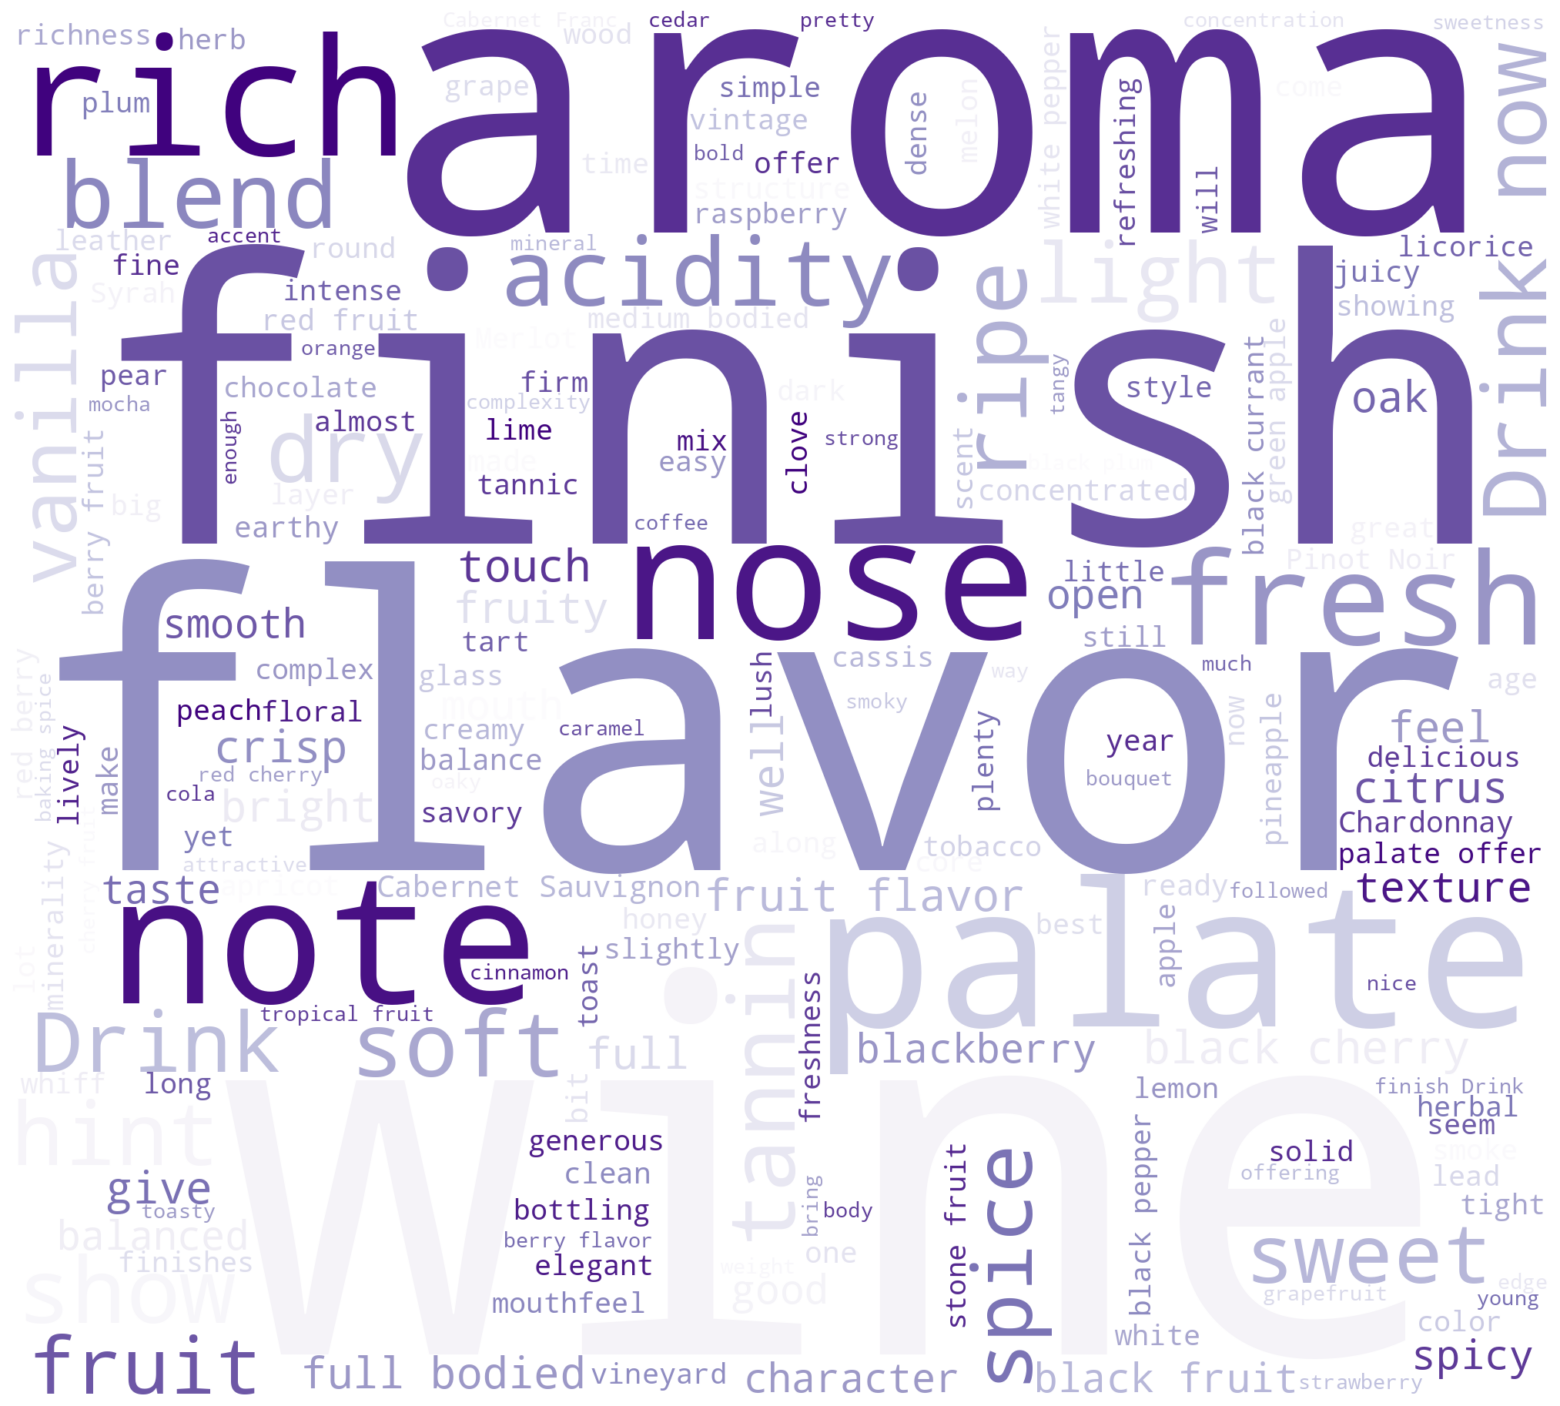

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto = " ".join(dados_2['description'].dropna())


wordcloud = WordCloud(
    width=2000,
    height=1800,
    background_color='white',
    colormap='Purples'
).generate(texto)

plt.figure(figsize=(20,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



## Conclusão

- **De qual país vem o melhor vinho?**  
  **R:** A Inglaterra é, em média, quem produz mais vinhos de alta qualidade.

- **Existe relação entre o preço do vinho e a qualidade?**  
  **R:** Sim, está nítido que o preço do vinho está relacionado com a qualidade dele.

- **Existem tipos de uva de maior qualidade?**  
  **R:** Com base nos dados, a uva do tipo *Pinot Noir* se destaca como a de maior qualidade.

- **Qual vinho em cada faixa de preço?**  
  **R:** Encontramos opções de vinho para cada orçamento, conforme os dados apresentados acima.


